In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgInput = cv2.cvtColor(cv2.imread("input.png"), cv2.COLOR_BGR2RGB)
imgTarget = cv2.cvtColor(cv2.imread("target.png"), cv2.COLOR_BGR2RGB)

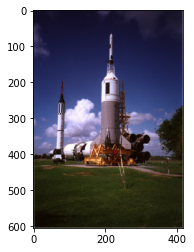

In [3]:
plt.imshow(imgInput)

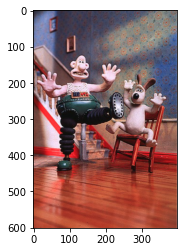

In [4]:
plt.imshow(imgTarget)

In [5]:
def calcHist(mat):
    hist = np.zeros(256)
    for x in range(mat.shape[0]):
        for y in range(mat.shape[1]):
            hist[mat[x][y]] += 1
    return hist

In [6]:
def cdf(mat):
    hist = calcHist(mat)
    S = mat.shape[0] * mat.shape[1]
    cdf = np.zeros(len(hist))
    sHist = np.zeros(len(hist))
    sHist[0] = hist[0]
    cdf[0] = sHist[0]/S
    for i in range(1,len(hist)):
        sHist[i] = hist[i] + sHist[i-1]
        cdf[i] = sHist[i]/S
    return cdf

In [7]:
def histMatching(src, tar):
    lut = [i for i in range(256)]
    
    cdfInput = cdf(src)
    cdfTarget = cdf(tar)
    
    res = np.zeros((src.shape[0],src.shape[1]), dtype=np.uint8)
    
    j = 0
    for i in range(256):
        while cdfTarget[j] < cdfInput[i] and j < 256:
            j += 1
        lut[i] = j
                
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y] = lut[src[x][y]]
            
    return res

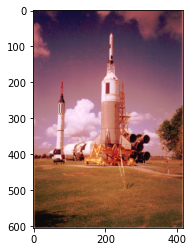

In [8]:
matR = histMatching(imgInput[:,:,0], imgTarget[:,:,0])
matG = histMatching(imgInput[:,:,1], imgTarget[:,:,1])
matB = histMatching(imgInput[:,:,2], imgTarget[:,:,2])

resImg = cv2.merge((matR, matG, matB))

plt.imshow(resImg)